In [1]:
#（シャープ）以降の文字はプログラムに影響しません。
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
from pandas.tools import plotting # 高度なプロットを行うツールのインポート
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [2]:
from matplotlib.colors import LinearSegmentedColormap
def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))
    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)
cm = generate_cmap(['mediumblue', 'limegreen', 'orangered'])

In [3]:
# ウェブ上のリソースを指定する
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'winequality-white.data') # Python 2 の場合
urllib.request.urlretrieve(url, 'winequality-white.data') # Python 3 の場合

('winequality-white.data', <http.client.HTTPMessage at 0x109192080>)

In [9]:
df = pd.read_csv('winequality-white.data', sep=';') # データの読み込み

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45,170,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14,132,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30,97,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47,186,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47,186,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30,97,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30,136,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45,170,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14,132,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28,129,0.99380,3.22,0.45,11.000000,6


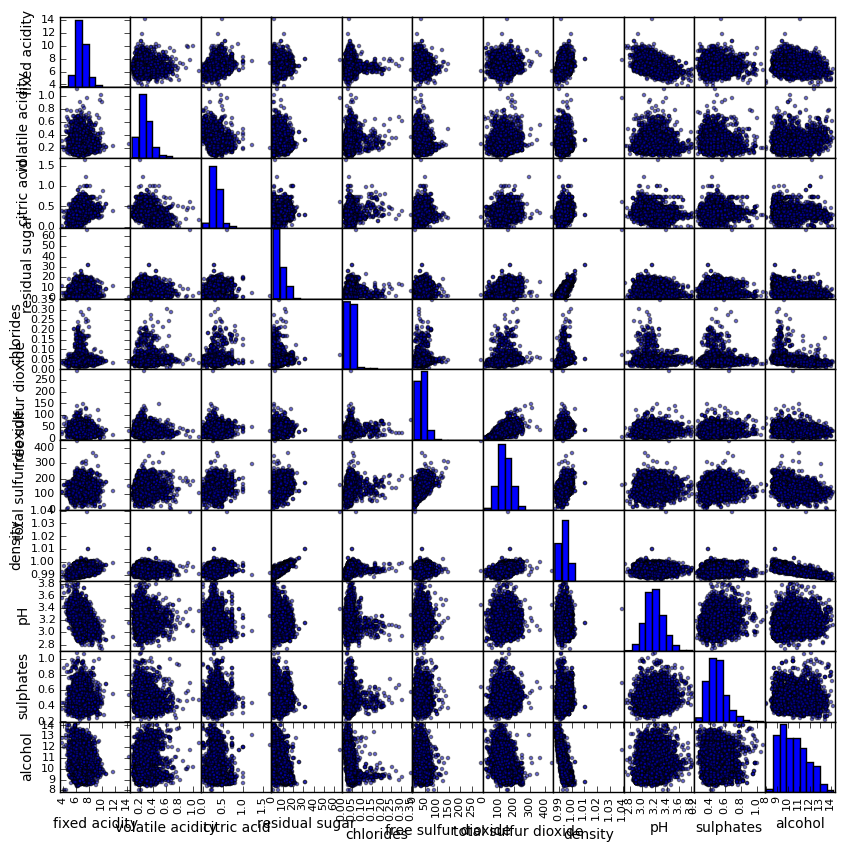

In [12]:
# 下記の関数にカラム名を入力すれば、Scatter Matrix が表示されます。
plotting.scatter_matrix(df[list(df.columns[:-1])], figsize=(10, 10)) 
plt.show()

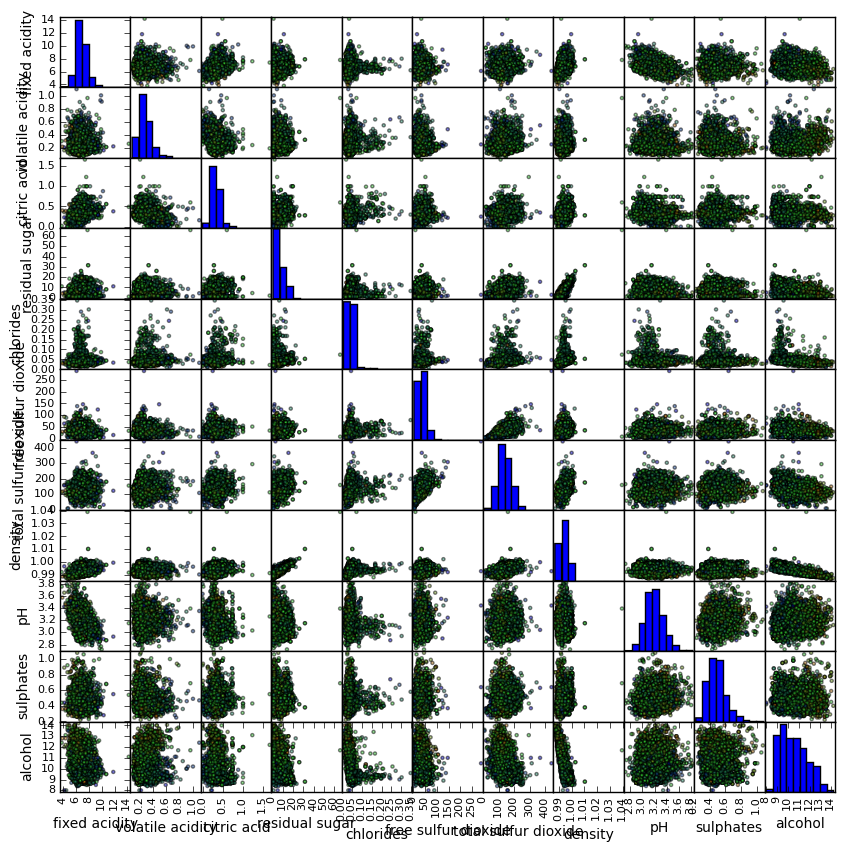

In [14]:
#color_index = list(set(df.iloc[:, 0]))
#colors = [color_index.index(i) for i in df.iloc[:, 0]]

# 下記の関数にカラム名を入力すれば、Scatter Matrix が表示されます。
plotting.scatter_matrix(df[list(df.columns[:-1])], figsize=(10, 10), c=df.iloc[:,-1], cmap=cm, alpha=0.5) 
plt.show()

In [15]:
dfs = (df.iloc[:, :-1] - df.iloc[:, :-1].mean()) / df.iloc[:, :-1].std()

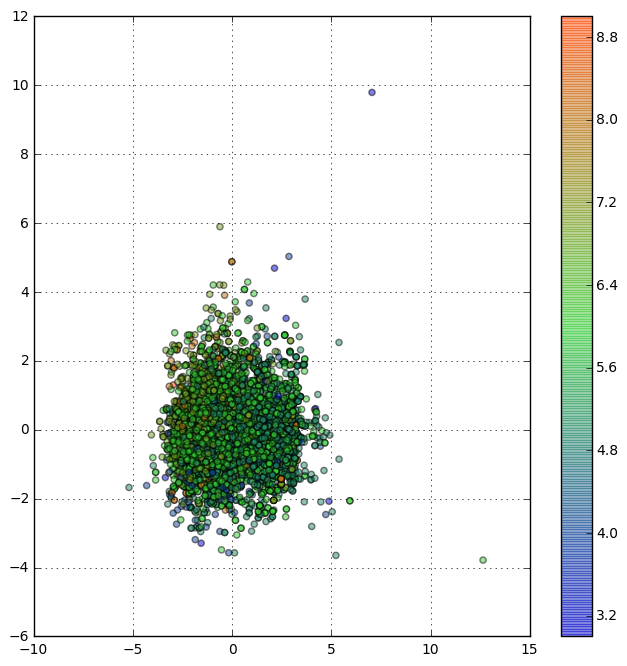

In [16]:
#color_index = list(set(df.iloc[:, 0]))
#colors = [color_index.index(i) for i in df.iloc[:, 0]]

#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, 1:])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, 1:])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
#for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
#    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, c=df.iloc[:,-1], cmap=cm)
plt.grid()
plt.colorbar()
plt.show()